In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
price_and_demand = pd.read_csv("price_and_demand.csv")
price_and_demand

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE
0,VIC1,1/11/2022 0:30,4178.18,8.94,TRADE
1,VIC1,1/11/2022 1:00,4086.02,0.14,TRADE
2,VIC1,1/11/2022 1:30,4033.37,0.02,TRADE
3,VIC1,1/11/2022 2:00,3985.64,0.00,TRADE
4,VIC1,1/11/2022 2:30,3885.64,0.02,TRADE
...,...,...,...,...,...
8347,VIC1,23/04/2023 22:00,4717.55,84.09,TRADE
8348,VIC1,23/04/2023 22:30,4520.39,81.25,TRADE
8349,VIC1,23/04/2023 23:00,4472.49,93.97,TRADE
8350,VIC1,23/04/2023 23:30,4621.36,83.96,TRADE


In [3]:
# Check datatype of the dataframe
price_and_demand.dtypes

REGION             object
SETTLEMENTDATE     object
TOTALDEMAND       float64
RRP               float64
PERIODTYPE         object
dtype: object

In [4]:
# check if there is any mising data
price_and_demand.isna().sum()

REGION            0
SETTLEMENTDATE    0
TOTALDEMAND       0
RRP               0
PERIODTYPE        0
dtype: int64

In [5]:
# Convert "SETTLEMENTDATE" column to datetime
price_and_demand["SETTLEMENTDATE"] = pd.to_datetime(price_and_demand["SETTLEMENTDATE"], format="%d/%m/%Y %H:%M")

In [6]:
# Extract date from "SETTLEMENTDATE" and create a new 'Date' column
price_and_demand['Date'] = price_and_demand['SETTLEMENTDATE'].dt.date

In [7]:
price_and_demand.sample(20)

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE,Date
5813,VIC1,2023-03-02 03:00:00,4029.28,88.78,TRADE,2023-03-02
4959,VIC1,2023-02-12 08:00:00,3718.52,-38.00,TRADE,2023-02-12
4991,VIC1,2023-02-13 00:00:00,4120.02,119.97,TRADE,2023-02-13
902,VIC1,2022-11-19 19:30:00,4680.43,97.23,TRADE,2022-11-19
1632,VIC1,2022-12-05 00:30:00,4330.16,101.59,TRADE,2022-12-05
486,VIC1,2022-11-11 03:30:00,4029.28,133.47,TRADE,2022-11-11
7140,VIC1,2023-03-29 18:30:00,5289.41,162.02,TRADE,2023-03-29
5745,VIC1,2023-02-28 17:00:00,5652.15,86.14,TRADE,2023-02-28
2954,VIC1,2023-01-01 13:30:00,5208.82,28.54,TRADE,2023-01-01
4448,VIC1,2023-02-01 16:30:00,4646.44,-22.20,TRADE,2023-02-01


In [8]:
# Calculate maximum daily energy demand and average rrp
max_edemand = price_and_demand.groupby("Date")['TOTALDEMAND'].max()
mean_rrp = price_and_demand.groupby("Date")['RRP'].mean().round(2)

In [9]:
mean_rrp

Date
2022-11-01     -3.76
2022-11-02     -2.52
2022-11-03     63.21
2022-11-04    110.94
2022-11-05     72.96
               ...  
2023-04-20    130.71
2023-04-21    131.46
2023-04-22     80.39
2023-04-23     63.21
2023-04-24     63.77
Name: RRP, Length: 175, dtype: float64

In [10]:
weather = pd.read_csv("weather.csv", encoding='latin-1')
weather

,Location,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,"Melbourne (Olympic Park), Victoria",1/11/2022,8.5,13.3,3.0,NaN,NaN,SW,44.0,11:36,...,NaN,NW,13,991.3,13.2,59.0,NaN,WNW,11.0,991.5
1,"Melbourne (Olympic Park), Victoria",2/11/2022,6.9,15.7,2.8,NaN,NaN,SSW,43.0,11:33,...,NaN,W,9,1006.7,15.1,54.0,NaN,SSW,13.0,1008.4
2,"Melbourne (Olympic Park), Victoria",3/11/2022,9.1,15.4,0.4,NaN,NaN,SSW,31.0,8:07,...,NaN,SSW,9,1019.2,13.8,67.0,NaN,SSW,9.0,1021.3
3,"Melbourne (Olympic Park), Victoria",4/11/2022,10.2,17.8,0.2,NaN,NaN,S,24.0,14:50,...,NaN,WSW,6,1028.1,16.9,56.0,NaN,SW,9.0,1026.6
4,"Melbourne (Olympic Park), Victoria",5/11/2022,11.8,22.7,0.0,NaN,NaN,N,31.0,11:58,...,NaN,N,9,1026.3,18.8,65.0,NaN,SW,11.0,1023.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,"Melbourne (Olympic Park), Victoria",20/04/2023,7.8,18.5,0.0,NaN,NaN,SSW,17.0,12:47,...,NaN,NNE,7,1026.8,17.5,58.0,NaN,SW,4.0,1025.5
171,"Melbourne (Olympic Park), Victoria",21/04/2023,11.3,19.0,0.0,NaN,NaN,SSW,13.0,10:48,...,NaN,NE,6,1030.5,18.6,64.0,NaN,SSE,2.0,1029.2
172,"Melbourne (Olympic Park), Victoria",22/04/2023,14.6,19.2,0.0,NaN,NaN,SSW,22.0,16:09,...,NaN,SW,6,1031.9,18.8,64.0,NaN,SSW,11.0,1029.7
173,"Melbourne (Olympic Park), Victoria",23/04/2023,14.8,19.0,0.0,NaN,NaN,SSW,26.0,15:45,...,NaN,SSE,7,1034.4,17.8,71.0,NaN,SSW,13.0,1032.4


In [11]:
weather.dtypes

Location                              object
Date                                  object
Minimum temperature (°C)             float64
Maximum temperature (°C)             float64
Rainfall (mm)                        float64
Evaporation (mm)                     float64
Sunshine (hours)                     float64
Direction of maximum wind gust        object
Speed of maximum wind gust (km/h)    float64
Time of maximum wind gust             object
9am Temperature (°C)                 float64
9am relative humidity (%)              int64
9am cloud amount (oktas)             float64
9am wind direction                    object
9am wind speed (km/h)                 object
9am MSL pressure (hPa)               float64
3pm Temperature (°C)                 float64
3pm relative humidity (%)            float64
3pm cloud amount (oktas)             float64
3pm wind direction                    object
3pm wind speed (km/h)                float64
3pm MSL pressure (hPa)               float64
dtype: obj

In [12]:
weather.isna().sum()

Location                               0
Date                                   0
Minimum temperature (°C)               0
Maximum temperature (°C)               1
Rainfall (mm)                          0
Evaporation (mm)                     175
Sunshine (hours)                     175
Direction of maximum wind gust         1
Speed of maximum wind gust (km/h)      1
Time of maximum wind gust              1
9am Temperature (°C)                   0
9am relative humidity (%)              0
9am cloud amount (oktas)             175
9am wind direction                     0
9am wind speed (km/h)                  0
9am MSL pressure (hPa)                 0
3pm Temperature (°C)                   1
3pm relative humidity (%)              1
3pm cloud amount (oktas)             175
3pm wind direction                     1
3pm wind speed (km/h)                  1
3pm MSL pressure (hPa)                 1
dtype: int64

In [13]:
missing_value = weather[["Minimum temperature (°C)", "Maximum temperature (°C)", "Rainfall (mm)", "Speed of maximum wind gust (km/h)"]] .isnull()
missing_value

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Speed of maximum wind gust (km/h)
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
170,False,False,False,False
171,False,False,False,False
172,False,False,False,False
173,False,False,False,False


In [14]:
weather["Date"] = pd.to_datetime(weather['Date'], format="%d/%m/%Y")
weather.head()

,Location,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,"Melbourne (Olympic Park), Victoria",2022-11-01,8.5,13.3,3.0,NaN,NaN,SW,44.0,11:36,...,NaN,NW,13,991.3,13.2,59.0,NaN,WNW,11.0,991.5
1,"Melbourne (Olympic Park), Victoria",2022-11-02,6.9,15.7,2.8,NaN,NaN,SSW,43.0,11:33,...,NaN,W,9,1006.7,15.1,54.0,NaN,SSW,13.0,1008.4
2,"Melbourne (Olympic Park), Victoria",2022-11-03,9.1,15.4,0.4,NaN,NaN,SSW,31.0,8:07,...,NaN,SSW,9,1019.2,13.8,67.0,NaN,SSW,9.0,1021.3
3,"Melbourne (Olympic Park), Victoria",2022-11-04,10.2,17.8,0.2,NaN,NaN,S,24.0,14:50,...,NaN,WSW,6,1028.1,16.9,56.0,NaN,SW,9.0,1026.6
4,"Melbourne (Olympic Park), Victoria",2022-11-05,11.8,22.7,0.0,NaN,NaN,N,31.0,11:58,...,NaN,N,9,1026.3,18.8,65.0,NaN,SW,11.0,1023.2


In [15]:
# Extract selected variable columns to form new dataframe
selected_variables = ["Date", "Minimum temperature (°C)", "Maximum temperature (°C)", "Rainfall (mm)", "Speed of maximum wind gust (km/h)"]
processed_data = weather[selected_variables].set_index('Date')

In [16]:
processed_data.head()

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Speed of maximum wind gust (km/h)
Date,,,,
2022-11-01,8.5,13.3,3.0,44.0
2022-11-02,6.9,15.7,2.8,43.0
2022-11-03,9.1,15.4,0.4,31.0
2022-11-04,10.2,17.8,0.2,24.0
2022-11-05,11.8,22.7,0.0,31.0


In [17]:
#substitude missing data with the average value of the respective column
processed_data[["Maximum temperature (°C)", "Speed of maximum wind gust (km/h)"]] = processed_data[["Maximum temperature (°C)", "Speed of maximum wind gust (km/h)"]].fillna(processed_data[["Maximum temperature (°C)", "Speed of maximum wind gust (km/h)"]].mean().round(2))
processed_data.tail()

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Speed of maximum wind gust (km/h)
Date,,,,
2023-04-20,7.8,18.50,0.0,17.00
2023-04-21,11.3,19.00,0.0,13.00
2023-04-22,14.6,19.20,0.0,22.00
2023-04-23,14.8,19.00,0.0,26.00
2023-04-24,11.0,23.12,0.0,34.56


In [18]:
processed_data.insert(loc = 2, column = "Average Temerature (°C)", value = (processed_data["Minimum temperature (°C)"] + processed_data["Maximum temperature (°C)"]) / 2)
processed_data.head()

,Minimum temperature (°C),Maximum temperature (°C),Average Temerature (°C),Rainfall (mm),Speed of maximum wind gust (km/h)
Date,,,,,
2022-11-01,8.5,13.3,10.90,3.0,44.0
2022-11-02,6.9,15.7,11.30,2.8,43.0
2022-11-03,9.1,15.4,12.25,0.4,31.0
2022-11-04,10.2,17.8,14.00,0.2,24.0
2022-11-05,11.8,22.7,17.25,0.0,31.0


In [19]:
processed_data["Average RRP"] = mean_rrp
processed_data["Maximum Energry Demand"] = max_edemand
processed_data.tail()

,Minimum temperature (°C),Maximum temperature (°C),Average Temerature (°C),Rainfall (mm),Speed of maximum wind gust (km/h),Average RRP,Maximum Energry Demand
Date,,,,,,,
2023-04-20,7.8,18.50,13.15,0.0,17.00,130.71,6084.21
2023-04-21,11.3,19.00,15.15,0.0,13.00,131.46,5903.60
2023-04-22,14.6,19.20,16.90,0.0,22.00,80.39,5313.61
2023-04-23,14.8,19.00,16.90,0.0,26.00,63.21,5361.47
2023-04-24,11.0,23.12,17.06,0.0,34.56,63.77,4395.96


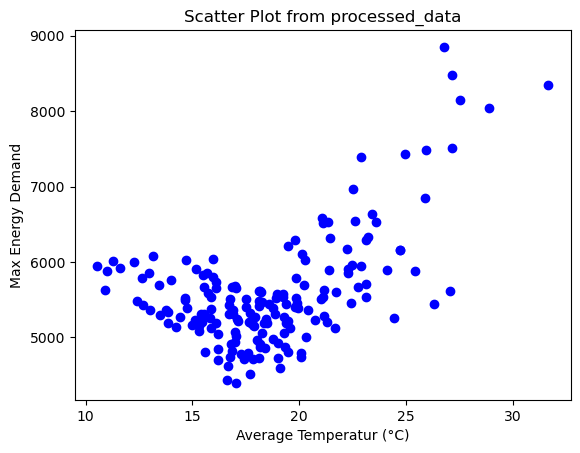

In [20]:
plt.scatter(processed_data["Average Temerature (°C)"], processed_data["Maximum Energry Demand"], label="Data Points", color="blue")
plt.xlabel("Average Temperatur (°C)")
plt.ylabel("Max Energy Demand")
plt.title("Scatter Plot from processed_data")
plt.show()

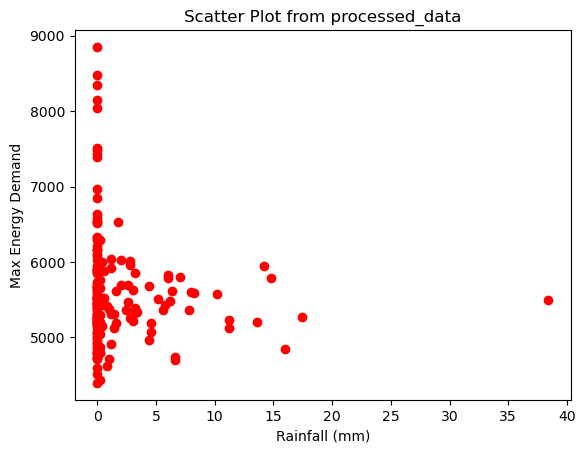

In [21]:
plt.scatter(processed_data["Rainfall (mm)"], processed_data["Maximum Energry Demand"], label="Data Points", color="red")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Max Energy Demand")
plt.title("Scatter Plot from processed_data")
plt.show()

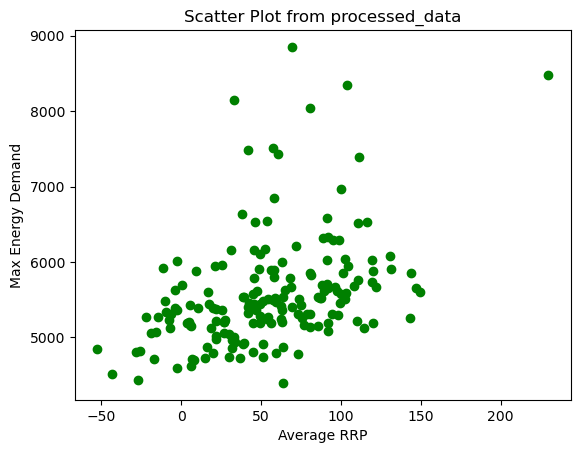

In [22]:
plt.scatter(processed_data["Average RRP"], processed_data["Maximum Energry Demand"], label="Data Points", color="green")
plt.xlabel("Average RRP")
plt.ylabel("Max Energy Demand")
plt.title("Scatter Plot from processed_data")
plt.show()

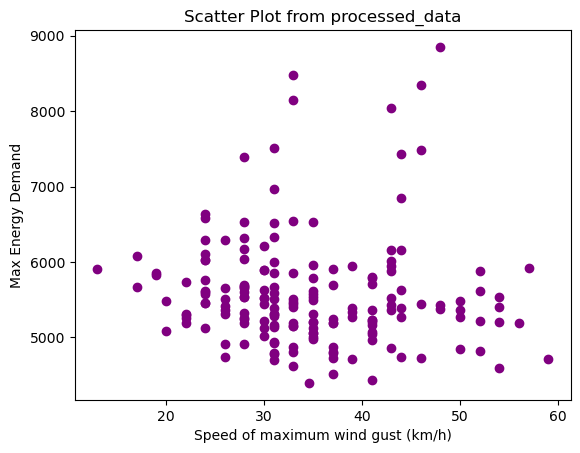

In [23]:
plt.scatter(processed_data["Speed of maximum wind gust (km/h)"], processed_data["Maximum Energry Demand"], label="Data Points", color="purple")
plt.xlabel("Speed of maximum wind gust (km/h)")
plt.ylabel("Max Energy Demand")
plt.title("Scatter Plot from processed_data")
plt.show()

### Based on above scatter plots, there are no linear relationship between independent variables and dependent variable(max energy demand). Decision tree might be a better model to help make prediction. We can start by categorize average daily temp(the most significant independent variable which we believe have a stronger relationship with energy demand)

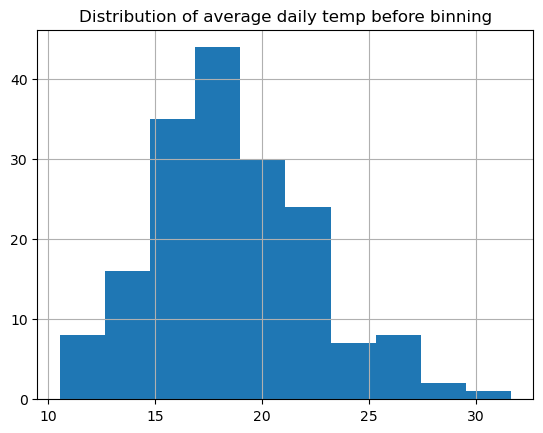

In [24]:
processed_data["Average Temerature (°C)"].hist()

plt.title("Distribution of average daily temp before binning")

plt.show()

In [25]:
def bin_temp(x):
    """
    We categorize average daily temp into following bins according to data distrubution and scatter plot:
    
        [min, 17), [17, 23), [23, max] 
        
    [] denote inclusive, () denote exclusive.
    """
    LOWER = 17
    UPPER = 23
    
    # [min, 17)
    if x < LOWER:
        return 0
    # [17, 23)
    elif LOWER <= x < UPPER:
        return 1 
    # [23, max] 
    return 2

# apply the function on the serie
processed_data.insert(loc = 3, column = "bin temp", value = processed_data["Average Temerature (°C)"].apply(bin_temp))

processed_data

,Minimum temperature (°C),Maximum temperature (°C),Average Temerature (°C),bin temp,Rainfall (mm),Speed of maximum wind gust (km/h),Average RRP,Maximum Energry Demand
Date,,,,,,,,
2022-11-01,8.5,13.30,10.90,0,3.0,44.00,-3.76,5627.52
2022-11-02,6.9,15.70,11.30,0,2.8,43.00,-2.52,6018.43
2022-11-03,9.1,15.40,12.25,0,0.4,31.00,63.21,6004.84
2022-11-04,10.2,17.80,14.00,0,0.2,24.00,110.94,5757.62
2022-11-05,11.8,22.70,17.25,1,0.0,31.00,72.96,4783.60
...,...,...,...,...,...,...,...,...
2023-04-20,7.8,18.50,13.15,0,0.0,17.00,130.71,6084.21
2023-04-21,11.3,19.00,15.15,0,0.0,13.00,131.46,5903.60
2023-04-22,14.6,19.20,16.90,0,0.0,22.00,80.39,5313.61


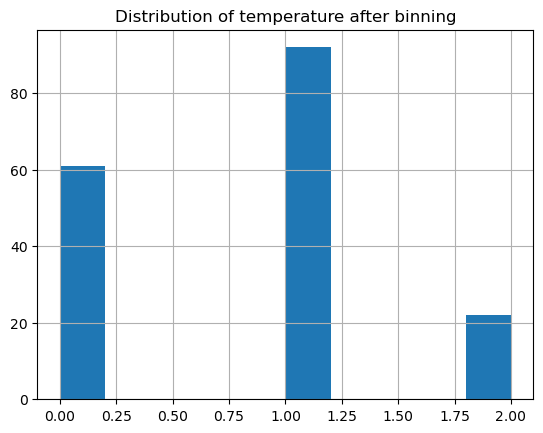

In [26]:
processed_data['bin temp'].hist()

plt.title('Distribution of temperature after binning')

plt.show()